In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

In [2]:
census = pd.read_csv('Census.csv')

In [3]:
census.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [4]:
census.shape

(569740, 19)

Turn values that include -9 to categorical and then back to numerical using label encoder

In [5]:
census['Family Composition'] = census['Family Composition'].replace([1,2,3,4,5,6,-9], ['Not in a family', 'Married/same-sex civil partnership couple family', 'Cohabiting couple family', 'Lone parent family(male head)', 'Lone parent family(female head)', 'Other related family', 'No code required'])
print(census['Family Composition'].value_counts())
census['Country of Birth'] = census['Country of Birth'].replace([1, 2, -9], ['UK', 'Non UK', 'No Code Required'])
print(census['Country of Birth'].value_counts())
census['Health'] = census['Health'].replace([1, 2, 3, 4, 5, -9], ['Very good health', 'Good health', 'Fair health', 'Bad health', 'Very bad health', 'No code required'])
print(census['Health'].value_counts())
census['Ethnic Group'] = census['Ethnic Group'].replace([1, 2, 3, 4, 5, -9], ['White', 'Mixed', 'Asian and Asian British', 'Black or Black British', 'Chinese or Other ethnic group', 'Not resident in England or Wales, students or schoolchildren living away during term-time'])
print(census['Ethnic Group'].value_counts())
census['Religion'] = census['Religion'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['No religion', 'Christian', 'Buddhist', 'Hindu', 'Jewish',  'Muslim', 'Sikh', 'Other religion', 'Not stated', 'No code required'])
print(census['Religion'].value_counts())
census['Economic Activity'] = census['Economic Activity'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Economically active: Employee', 'Economically active: Self-employed', 'Economically active: Unemployed', 'Economically active: Full-time student', 'Economically inactive: Retired',  'Economically inactive: Student', 'Economically inactive: Looking after home or family', 'Economically inactive: Long-term sick or disabled', 'Economically inactive: Other', 'No code required'])
print(census['Economic Activity'].value_counts())
census['Occupation'] = census['Occupation'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Managers, Directors and Senior Officials', 'Professional Occupations', 'Associate Professional and Technical Occupations', 'Administrative and Secretarial Occupations', 'Skilled Trades Occupations',  'Caring, Leisure and Other Service Occupations', 'Sales and Customer Service Occupations', 'Process, Plant and Machine Operatives', 'Elementary Occupations', 'No code required'])
print(census['Occupation'].value_counts())
census['Industry'] = census['Industry'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9], ['Agriculture, forestry and fishing', 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply', 'Construction', 'Wholesale and retail trade; Repair of motor vehicles and motorcycles', 'Accommodation and food service activities',  'Transport and storage; Information and communication', 'Financial and insurance activities; Intermediation', 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies', 'No code required'])
print(census['Industry'].value_counts())
census['Hours worked per week'] = census['Hours worked per week'].replace([1, 2, 3, 4, -9], ['Part-time: 15 or less hours worked', 'Part-time: 16 to 30 hours worked', 'Full-time: 31 to 48 hours worked', 'Full-time: 49 or more hours worked', 'No code required'])
print(census['Hours worked per week'].value_counts())
census['Approximated Social Grade'] = census['Approximated Social Grade'].replace([1, 2, 3, 4, -9], ['AB', 'C1', 'C2', 'DE', 'No code required'])
print(census['Approximated Social Grade'].value_counts())

Married/same-sex civil partnership couple family    300961
Not in a family                                      96690
Cohabiting couple family                             72641
Lone parent family(female head)                      64519
No code required                                     18851
Lone parent family(male head)                         9848
Other related family                                  6230
Name: Family Composition, dtype: int64
UK                  485645
Non UK               77291
No Code Required      6804
Name: Country of Birth, dtype: int64
Very good health    264971
Good health         191743
Fair health          74480
Bad health           24558
Very bad health       7184
No code required      6804
Name: Health, dtype: int64
White                                                                                        483477
Asian and Asian British                                                                       42711
Black or Black British                   

Turn nominal to numeric data

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
census['Region'] = LE.fit_transform(census['Region'])
census['Residence Type'] = LE.fit_transform(census['Residence Type'])
census['Family Composition'] = LE.fit_transform(census['Family Composition'])
census['Country of Birth'] = LE.fit_transform(census['Country of Birth'])
census['Health'] = LE.fit_transform(census['Health'])
census['Ethnic Group'] = LE.fit_transform(census['Ethnic Group'])
census['Religion'] = LE.fit_transform(census['Religion'])
census['Economic Activity'] = LE.fit_transform(census['Economic Activity'])
census['Occupation'] = LE.fit_transform(census['Occupation'])
census['Industry'] = LE.fit_transform(census['Industry'])
census['Hours worked per week'] = LE.fit_transform(census['Hours worked per week'])
census['Approximated Social Grade'] = LE.fit_transform(census['Approximated Social Grade'])

Fill in missing values

In [7]:
census['No of hours'].fillna(method='bfill', inplace=True)

Normalize all data except target

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
census[['Person ID','Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'Approximated Social Grade']] = min_max_scaler.fit_transform(census[['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'Approximated Social Grade']])


Use pearson correlation to see which predictor attributes to use

In [9]:
pearsoncorr=census.corr(method='pearson')
sorted_corr = pearsoncorr.sort_values(by='No of hours', axis=0, ascending=False)
sorted_corr

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
No of hours,-0.002718,0.019147,0.079088,-0.029664,-0.075590,-0.156448,0.068663,0.019534,0.401851,0.002736,0.088028,0.058331,0.020661,-0.802477,-0.010466,0.007196,-0.601147,1.000000,-0.427747
Student,-0.021902,-0.002115,0.067139,0.090146,-0.173726,0.017002,0.614706,0.390542,1.000000,0.086595,-0.286053,0.128266,-0.088733,-0.565298,-0.074034,-0.004358,-0.194884,0.401851,-0.432101
Health,0.010184,0.026581,0.038233,-0.143930,0.005569,-0.032204,-0.471759,-0.319181,-0.286053,0.002325,1.000000,-0.043605,0.065848,0.022929,0.014877,0.004486,-0.056987,0.088028,0.077899
Residence Type,0.011954,-0.002683,1.000000,-0.109269,-0.066833,0.000245,-0.020930,-0.024958,0.067139,0.030716,0.038233,0.016456,-0.009692,-0.062953,-0.004897,0.005775,-0.037063,0.079088,-0.189946
Age,-0.042578,-0.000452,-0.020930,0.284644,-0.093765,0.042331,1.000000,0.639171,0.614706,0.056499,-0.471759,0.159385,-0.207592,-0.210356,-0.057064,-0.016660,-0.007795,0.068663,-0.401062
Ethnic Group,-0.184456,-0.025579,0.016456,-0.040785,-0.072964,0.007990,0.159385,0.085739,0.128266,0.422694,-0.043605,1.000000,-0.100212,-0.059542,-0.028082,-0.012986,-0.031332,0.058331,-0.062044
Religion,0.021569,0.054679,-0.009692,-0.068804,0.067585,-0.067772,-0.207592,-0.143106,-0.088733,-0.050284,0.065848,-0.100212,1.000000,0.002262,0.027355,0.016613,-0.027168,0.020661,0.045397
Marital Status,-0.035477,-0.007568,-0.024958,0.221034,-0.075922,0.129012,0.639171,1.000000,0.390542,0.027904,-0.319181,0.085739,-0.143106,-0.105486,-0.054370,-0.016098,0.017295,0.019534,-0.190222
Region,0.108667,1.000000,-0.002683,0.019716,0.015484,-0.000065,-0.000452,-0.007568,-0.002115,-0.067448,0.026581,-0.025579,0.054679,-0.005742,-0.010629,0.006840,-0.006154,0.019147,-0.037341
Industry,0.004131,0.006840,0.005775,-0.006027,-0.003044,-0.037275,-0.016660,-0.016098,-0.004358,0.014365,0.004486,-0.012986,0.016613,-0.009605,-0.010563,1.000000,-0.022331,0.007196,0.009179


Drop all unnecesary columns

In [10]:
columns_to_drop = ['Sex', 'Population Base', 'Health', 'Person ID', 'Religion', 'Region', 'Marital Status', 'Ethnic Group', 'Family Composition', 'Age', 'Residence Type', 'Hours worked per week',  'Economic Activity', 'Country of Birth']
census.drop(columns=columns_to_drop, inplace=True)

In [11]:
census.columns

Index(['Student', 'Occupation', 'Industry', 'No of hours',
       'Approximated Social Grade'],
      dtype='object')

Place the target column in the end of our dataframe

In [12]:
desired_order = ['Student', 'Occupation', 'Industry', 'Approximated Social Grade', 'No of hours']
census = census[desired_order]

In [13]:
census.head()

,Student,Occupation,Industry,Approximated Social Grade,No of hours
0,1.0,0.666667,0.500000,0.75,2.0
1,1.0,0.555556,0.583333,1.00,2.0
2,1.0,0.666667,0.500000,0.25,2.0
3,1.0,0.333333,0.000000,0.75,2.0
4,0.0,0.555556,0.583333,1.00,2.0


create lists of models and their metrics in order to compare at the end

In [14]:
models = []
MAE = []
MSE = []
RMSE = []
R2 = []
Adjusted_R2 = []

In [15]:
censusSample = census.sample(frac=0.1, replace=False, random_state=0)
X = censusSample.iloc[:,:-1].values    # predictor attributes
y = censusSample.iloc[:,-1].values     # target attributes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear Regression Partitioning

In [16]:
from sklearn.linear_model import LinearRegression
LRP = LinearRegression()
LRP.fit(X_train,y_train)
y_pred = LRP.predict(X_test)
models.append('LinearRegressionPartitioning')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2.append(r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print('R2 score:', r2_score(y_test, y_pred))
adj_r2 = 1-(1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

Mean Absolute Error: 13.92869017962348
Mean Squared Error: 275.02466634240477
Root Mean Squared Error: 16.583867653307077 

R2 score: 0.24173987639176509
Adjusted R2 score: 0.24147358662052432


Linear regression using Cross validation

In [17]:
LRPC = LinearRegression()
LRPCScore = cross_val_score(LRPC, X, y, cv=5)
print(LRPCScore)
y_pred = cross_val_predict(LRPC, X, y, cv=5)
models.append('LinearRegressionCrossValidation')
MAE.append(metrics.mean_absolute_error(y, y_pred))
MSE.append(metrics.mean_squared_error(y, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))
R2.append(r2_score(y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print('R2 score:', r2_score(y, y_pred))
adj_r2 = 1-(1-r2_score(y, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

[0.24952146 0.24480163 0.24143853 0.24652697 0.24278703]
Mean Absolute Error: 13.889294264261915
Mean Squared Error: 274.14114487316095
Root Mean Squared Error: 16.557208245146914 

R2 score: 0.24513426549016448
Adjusted R2 score: 0.24508126363059102


Regression tree partitioning

In [18]:
from sklearn.tree import DecisionTreeRegressor
DTRP = DecisionTreeRegressor(max_depth=5)
DTRP.fit(X_train, y_train)
y_pred = DTRP.predict(X_test)
models.append('RegressionTreePartitioning')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2.append(r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print('R2 score:', r2_score(y_test, y_pred))
adj_r2 = 1-(1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

Mean Absolute Error: 12.308050021136099
Mean Squared Error: 255.67048078910383
Root Mean Squared Error: 15.989699208837665 

R2 score: 0.29510057063477413
Adjusted R2 score: 0.294853020352293


Note: interpret the corellation using this graph

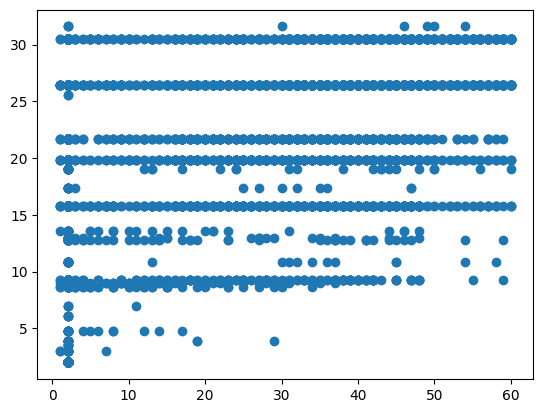

In [19]:
# scatter plot to visualise possible correlation
plt.scatter(y_test, y_pred)
plt.show()

Regression Tree cross-validation

In [20]:
DTRC = DecisionTreeRegressor(max_depth=5)
score = cross_val_score(DTRC, X, y, cv=5)
y_pred = cross_val_predict(DTRC, X, y, cv=5)
models.append('RegressionTreeCrossValidation')
MAE.append(metrics.mean_absolute_error(y, y_pred))
MSE.append(metrics.mean_squared_error(y, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))
R2.append(r2_score(y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print('R2 score:', r2_score(y, y_pred))
adj_r2 = 1-(1-r2_score(y, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

Mean Absolute Error: 12.216957550402173
Mean Squared Error: 252.94978269928328
Root Mean Squared Error: 15.904395074924519 

R2 score: 0.3034860797719988
Adjusted R2 score: 0.3034371750048287


SVR partitioning

In [21]:
from sklearn.svm import SVR
SVRP = SVR(kernel='poly')
SVRP.fit(X_train, y_train)
y_pred=SVRP.predict(X_test)
models.append('SVRPartitioning')
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2.append(r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print('R2 score:', r2_score(y_test, y_pred))
adj_r2 = 1-(1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

Mean Absolute Error: 12.15063048043486
Mean Squared Error: 280.79989396338095
Root Mean Squared Error: 16.757084888589095 

R2 score: 0.2258172143702607
Adjusted R2 score: 0.22554533279497369


SVR cross validation

In [22]:
SVRC = SVR(kernel='poly')
SvrCScore = cross_val_score(SVRC, X, y, cv=5)
print(SvrCScore)
y_pred = cross_val_predict(SVRC, X, y, cv=5)
models.append('SVRCrossValidation')
MAE.append(metrics.mean_absolute_error(y, y_pred))
MSE.append(metrics.mean_squared_error(y, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))
R2.append(r2_score(y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print('R2 score:', r2_score(y, y_pred))
adj_r2 = 1-(1-r2_score(y, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

[0.23533318 0.21492824 0.21114057 0.22585465 0.21139575]
Mean Absolute Error: 12.140411496492954
Mean Squared Error: 283.3029916922382
Root Mean Squared Error: 16.831606925431636 

R2 score: 0.2199065156325165
Adjusted R2 score: 0.2198517424411761


In [23]:
compare_models = pd.DataFrame({ 'Algorithms': models, 'Mean Absolute Error': MAE, 'Mean Squared Error': MSE, 'Root Mean Squared Error': RMSE, 'R2_Score': R2, 'Adjusted R2_Score': Adjusted_R2})
compare_models.sort_values(by = 'Adjusted R2_Score', ascending = False).reset_index(drop=True)

,Algorithms,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2_Score,Adjusted R2_Score
0,RegressionTreeCrossValidation,12.216958,252.949783,15.904395,0.303486,0.303437
1,RegressionTreePartitioning,12.308050,255.670481,15.989699,0.295101,0.294853
2,LinearRegressionCrossValidation,13.889294,274.141145,16.557208,0.245134,0.245081
3,LinearRegressionPartitioning,13.928690,275.024666,16.583868,0.241740,0.241474
4,SVRPartitioning,12.150630,280.799894,16.757085,0.225817,0.225545
5,SVRCrossValidation,12.140411,283.302992,16.831607,0.219907,0.219852
